
## <center>qiskit demo with Python</center>
## <center>Building a circuit - Running a circuit - Reading results </center>

### <span style="color:blue"><em>Jean-Michel Torres, IBM Q Hub France, torresjm@fr.ibm.com</em></span>


<div class="alert alert-block alert-success">
    
# 1. "Hello World" quantum computing with Python and  qiskit.
</div>

### Let's import what we need from qiskit library

<ul>
    <li>QuantumRegister : define and use qubits register </li>
    <li>ClassicalRegister : to perform measurement into </li>
    <li>QuantumCircuit : to build out circuit</li>
    <li>execute : method for circuit execution</li>
    <li>A backend to execute on, here we are using the local simulator provided within the "Aer" qiskit component </li> 
    <li>and tool for results display</li> 
</ul>

In [1]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram

### make instance of the required objects, including the quantum circuit, and let's add quantum gates to it: 

example  : `circ.x(qr[0])` for X gate, `circ.h(qr[0])` for H gate, `circ.cx(qr[0],qr[1])` for CNOT and  `circ.measure(qr,cr)` for measurement. 

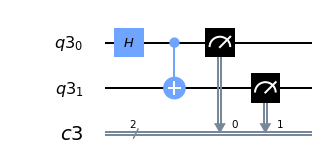

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr,cr)

qc.h(qr[0])

qc.cx(qr[0],qr[1])

qc.measure(qr,cr)

qc.draw(output='mpl')


In [6]:
# execution and result 
resultat = execute(qc,backend,shots=1011).result()

d = resultat.get_counts(qc)
d

{'11': 493, '00': 518}

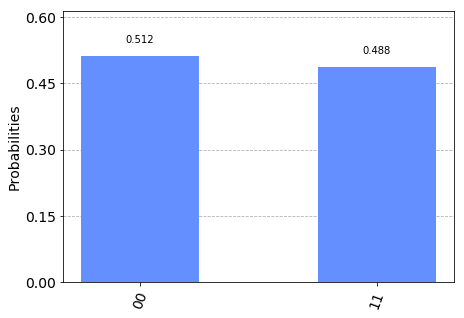

In [7]:
plot_histogram(resultat.get_counts(qc))

<div class="alert alert-block alert-success">

# 2. H+Cx on a real device, demo
</div>


Go to IBM Q Experience website : [here](https://quantum-computing.ibm.com).

Register with your choice of access method (IBMid, . If you agree accept the conditions for using IBM Q Experience.

![IBM Q Experience homepage](./IBMQX.png)*IBM Q Experience home page*

On the upper right corner go to "My Account":

![API Key](./API_Token.png)*Copy your API Key from here*


In [8]:
# required librairies
%matplotlib inline
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit import execute

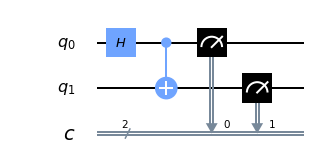

In [9]:
# building Bell state
qc = QuantumCircuit(2,2)

qc.h([0])
qc.cx([0],[1])

qc.measure([0,1],[0,1])
qc.draw(output='mpl')

In [10]:
# IBMQ module helps manage your IBM Q account data from your workstation. 
from qiskit import IBMQ

In [11]:
IBMQ.stored_account()

{'token': '94add97f029749a3f8bde07df2cb91bee02f620d896b22d022aefe37b7514ab920d70c23b59b306f49da00458e500573453ac887633bc2eda48feac10496e5e8',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

<div class="alert alert-block alert-warning">
IBMQ.stored.account() will not work at first time, you need to execute the following (only on time) : 

In [ ]:
#MY_API_TOKEN= '* * * paste you API token here * * *'
#IBMQ.save_account(MY_API_TOKEN, overwrite=True)

In [ ]:
# If you had an account activated before qiskit version 0.11 then you need to run this (once for all): 
#IBMQ.update_account()

In [12]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
# choose one available provider
selected_provider = IBMQ.get_provider(hub='ibm-q')

In [14]:
# list backends available for this provider
selected_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
# small program to get backends configs and status
# using least_busy() is more straightforward, this is to show
# how we get info from the provider's backends

sp = IBMQ.get_provider(hub='ibm-q')   # selected provider

backends_set = set()
for b in selected_provider.backends():
    backends_set.add(str(b))
   
print("backend name        queue qubits operational status message")
print("------------------- ----- ------ ----------- --------------")
for b in backends_set: 
    be = sp.get_backend(b)
    pj = be.status().pending_jobs
    qb = be.configuration().n_qubits
    op = be.status().operational 
    sm = be.status().status_msg
    print(f"{b:20} {pj:4} {qb:6}{op:12} {sm:6}")

backend name        queue qubits operational status message
------------------- ----- ------ ----------- --------------
ibmq_burlington         0      5           1 active
ibmq_armonk             0      1           1 active
ibmq_london             5      5           1 active
ibmq_vigo               1      5           1 active
ibmq_qasm_simulator     3     32           1 active
ibmq_ourense            0      5           1 active
ibmq_essex              1      5           1 active
ibmq_rome             171      5           1 active
ibmq_16_melbourne      22     15           1 active
ibmqx2                  3      5           1 active


In [17]:
# choose best backend (can use least_busy() as well ):
backend = sp.get_backend('ibmq_ourense')
backend.name()

'ibmq_ourense'

In [18]:
# execution

from qiskit.tools.monitor import job_monitor

job = execute(qc,backend, shots=1000)

print(job.job_id())

job_monitor(job)


5efb04577c0d6800138004b6
Job Status: job has successfully run


In [19]:
## lit le résultat
res = job.result()

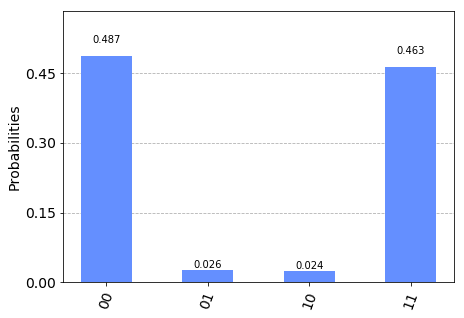

In [20]:
from qiskit.tools.visualization import plot_histogram

d = (res.get_counts(qc))
plot_histogram(d)

In [ ]:
d

<div class="alert alert-block alert-danger">

### Just in case we run out of time: 

In [ ]:
from IPython.display import Image, display
print("past result for the same experience:")
filename = './bellResult.png'
display(Image(filename=filename))